제일 먼저 할 일 ::  Runtime 유형 등록 -> gpu 설정

In [14]:
cd Tobigs_week7_assignment

/content/drive/My Drive/Colab Notebooks/Tobigs_week7_assignment


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [17]:
!pip install -q tensorflow-gpu==2.0.0-rc1
#colab에서는 tensorflow2.0이 디폴트가 아니기 때문에 이렇게 써서 2.0을 설치해주어야 함.

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 501kB 15.1MB/s 
     |████████████████████████████████| 4.3MB 37.6MB/s 


In [0]:
sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")
#다운받은 데이터를 불러온다

In [18]:
train.head()
#784개의 픽셀컬럼과 1개의 라벨로 이루어져 있다.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
test.head()
#784개의 픽셀컬럼과 이따 제출할 때 사용될 id 컬림이 있다.

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
train.shape

(42000, 785)

In [21]:
test.shape

(18000, 785)

## 데이터 전처리

In [0]:
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

X = train.iloc[:,1:].values
y = train.iloc[:,0].values
#train set을 feature와 label로 분류

X_test = test.iloc[:,1:].values
#test set에서 feature만 X_test에 따로 저장

X = X / 255
X_test = X_test / 255
#0~255 사이의 값을 갖는 픽셀값들을 0~1 사이의 값을 갖도록 변환

X = X.reshape(42000, 28, 28)
X_test = X_test.reshape(18000, 28, 28)

X = X[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

y = to_categorical(y, num_classes=10)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=77)
#train set을 나누어 validation set을 만들어준다. 

## 데이터 시각화

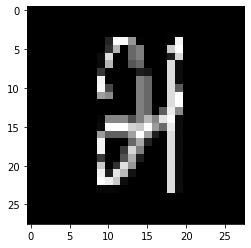

In [27]:
import matplotlib.pyplot as plt
idx = 90
plt.imshow(x_train[idx].reshape(28, 28), cmap="gray")
#데이터는 28*28 = 784개로 flatten되어 있기 때문에 이미지로 보려면 reshape로 다시 뭉쳐주어야 함.
#이 알아볼 수 있는 숫자는 대체 무엇일까?

In [28]:
y_train[idx]
#5였다고 한다.

5

## 모델링

## 데이터 증식

In [45]:
x_train.shape

(33600, 784)

In [0]:
import tensorflow as tf

# NN
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(64, input_shape=(784,)), #첫 번째 layer는 784개의 feature을 받아 64개로 출력.
#   tf.keras.layers.BatchNormalization(), #weight의 변동을 줄이기 위해 batchnormalization을 사용
#   tf.keras.layers.Dropout(0.2), #정규화를 위해 drop out을 사용하여 훈련 시 0.2만큼의 노드를 제외
#   tf.keras.layers.Dense(128, activation="relu"),#두 번째 layer를 선언하고 출력값은 128개, activation function을 지정.
#   tf.keras.layers.BatchNormalization(),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(256, activation="relu"), #세 번째 layer를 선언하고 출력값은 256개, activation function을 지정함.
#   tf.keras.layers.Dense(num_classes, activation="softmax"), #네 번째이자 마지막 layer의 출력값은 class의 개수인 10이며 activation function은 softmax
# ])


from keras_radam.training import RAdamOptimizer
from keras import optimizers 
from tensorflow.keras import layers

num_classes = 10 #class는 0~9이므로 10개
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(1000)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.3)(net)
net = layers.Dense(num_classes)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='CNN_test')

#activation function으로 selu를 써봤는데 relu가 제일 잘 나오는 것 같다.

In [0]:
from keras_radam.training import RAdamOptimizer
from keras import optimizers 

#1. optimizer = Radam
model.compile(optimizer=RAdamOptimizer(), loss="categorical_crossentropy", metrics=["accuracy"])

#2. optimizer = Adam 
# learning_rate = 0.0001
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [109]:
model.summary()

Model: "CNN_test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_36 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_37 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 64)        0  

In [0]:
#데이터 증식했다
#매우 많은 오류를 거치고 거쳐 나온 결과이다 
train_datagen = ImageDataGenerator(
      featurewise_center=False,
      featurewise_std_normalization=False,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=False)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

validation_generator = train_datagen.flow(x_val, y_val)


In [111]:
model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
      )

Epoch 1/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.5095 - acc: 0.8196 - val_loss: 0.0980 - val_acc: 0.9701
Epoch 2/10
1050/1050 [==============================] - 26s 25ms/step - loss: 0.1087 - acc: 0.9660 - val_loss: 0.0658 - val_acc: 0.9794
Epoch 3/10
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0815 - acc: 0.9748 - val_loss: 0.0451 - val_acc: 0.9865
Epoch 4/10
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0643 - acc: 0.9804 - val_loss: 0.0544 - val_acc: 0.9852
Epoch 5/10
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0547 - acc: 0.9838 - val_loss: 0.0360 - val_acc: 0.9905
Epoch 6/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0495 - acc: 0.9854 - val_loss: 0.0245 - val_acc: 0.9932
Epoch 7/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0451 - acc: 0.9870 - val_loss: 0.0254 - val_acc: 0.9927
Epoch 8/10
1050/1050 [==========================

In [112]:
predicted_result = model.predict(X_test)
predicted_result[0]

array([7.5875937e-14, 8.4810747e-21, 4.3907734e-19, 1.1769923e-18,
       1.9062492e-08, 4.5275936e-12, 4.2604473e-17, 3.1736255e-19,
       1.0000000e+00, 4.3287799e-16], dtype=float32)

In [113]:
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([8, 0, 5, 3, 8, 1, 9, 6, 6, 0])

In [114]:
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,5
4,48968,8


In [115]:
sample_submission["Category"] = pd.Series(predicted_labels)
sample_submission.head()
#이를 subsmission에 넣으면 제출용 파일 완성~

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("final_da_submission.csv", index=False)